In [15]:
# IMPORT LIBRARIES
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from data_plotting import Plots


In [16]:
# GENERATE DATA
X, y = make_regression(n_samples=100, n_features=1, noise=10)


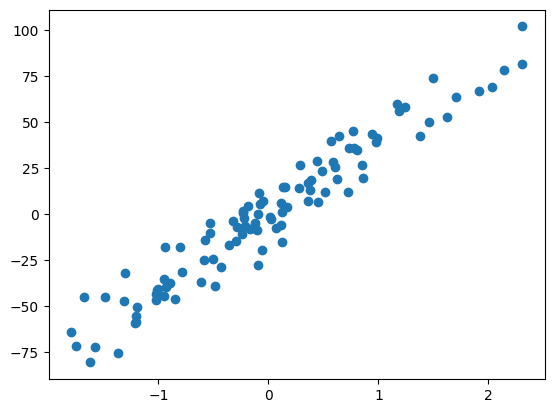

In [17]:
# PLOT DATA
plt.scatter(X, y)
plt.show()


In [18]:
# SCALE DATA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [20]:
# CREATE MODEL
# CREATE LINEAR SUPPORT VECTOR REGRESSOR
from sklearn.base import BaseEstimator
import numpy as np

class MyLinearSVR(BaseEstimator):
    def __init__(self, eta0=1, eta_d=1000, n_epochs=1000, epsilon=0.1):
        """
        This class implements a linear Support Vector Regressor. It aims to find a 
        hyperplane that best fits the data within a margin of tolerance, epsilon.
        
        :param eta0: Initial learning rate parameter
        :param eta_d: Learning rate decay parameter 
        :param n_epochs: Number of epochs
        :param epsilon: Epsilon parameter in the epsilon-insensitive loss function
        """
        super().__init__()
        self.eta0 = eta0
        self.eta_d = eta_d
        self.n_epochs = n_epochs
        self.epsilon = epsilon
        self.Js = []  # Container for losses
        self.intercept_ = None
        self.coef_ = None
        self.support_vectors_ = None

    def fit(self, X, y):
        """
        Fits the linear SVR model to the training data.
        
        :param X: Feature dataset
        :param y: Target values
        :returns: self
        """
        # Random initialization of weights and bias
        coef_ = np.random.randn(X.shape[1], 1)  # number of feature weights
        intercept_ = 0

        # Training
        for epoch in range(self.n_epochs):
            errors = y - (X.dot(coef_) + intercept_).ravel()

            # Support vectors are those outside the epsilon margin
            mask = np.abs(errors) > self.epsilon
            X_sv = X[mask]
            y_sv = y[mask]
            errors_sv = errors[mask].reshape(-1, 1)

            # Epsilon-insensitive loss (for visualization purposes)
            J = 1 / 2 * (coef_ * coef_).sum() + np.sum(np.maximum(0, np.abs(errors_sv) - self.epsilon))
            self.Js.append(J)

            # Compute gradients
            w_gradient_vector = coef_ - (X_sv * np.sign(errors_sv)).sum(axis=0).reshape(-1, 1)
            b_derivative = -np.sign(errors_sv).sum()

            # Update weights and bias
            eta = self.eta(epoch)
            coef_ = coef_ - eta * w_gradient_vector
            intercept_ = intercept_ - eta * b_derivative

        self.intercept_ = np.array([intercept_])
        self.coef_ = coef_.reshape(1, -1)
        self.support_vectors_ = X[mask]
        return self

    def eta(self, epoch):
        """
        Calculate the learning rate based on the epoch.
        """
        return self.eta0 / (1 + epoch / self.eta_d)

    def predict(self, X):
        """
        Predict the target values using the trained linear SVR model.
        
        :param X: Feature dataset
        :returns: Predicted target values
        """
        return X.dot(self.coef_.T).ravel() + self.intercept_

    def epsilon_insensitive_loss(self, y_true, y_pred):
        """
        Calculate the epsilon-insensitive loss.
        
        :param y_true: True target values
        :param y_pred: Predicted target values
        :returns: Loss value
        """
        return np.sum(np.maximum(0, np.abs(y_true - y_pred) - self.epsilon))

# Example usage:
# model = MyLinearSVR(eta0=0.01, eta_d=1000, n_epochs=500, epsilon=0.1)
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)


In [21]:
# FIT MODEL
svr = MyLinearSVR(eta0=0.01, eta_d=1000, n_epochs=500, epsilon=0.1)
svr.fit(X_train, y_train)

MyLinearSVR(eta0=0.01, n_epochs=500)

In [22]:
# PREDICT
y_pred = svr.predict(X_test)


In [23]:
# CROSS VALIDATION
scores = cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [ ]:
# PLOT TRAINING LOSS
svr.